# EFSA_study
## A hypothetical toxicological in-vivo experiment

_Gugliemo Cassini, Alessandro Capici e Andrea Prati_


### Problem presentation
A substance X was adiministered to laboratory animals and three endopoint (1, 2 and 3) were measured. Eight groups of animals were tested, 4 groups of males and 4 groups of females.

For each gender, one group was used as a control and each remaining group received one of three doses of substance X (30 mg/kg, 100 mg/kg and 150 mg/kg, administered to each animal daily).
### The goal
It is requested to propose an appropriate statistical model and to analyse these data.

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import xlrd
import time
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import funzioni as fn

# Data visualization
Here the dataset

sex: 1 = female  
sex: 0 = male

In [2]:
data=pd.read_excel('Data/Mini Project EFSA.xlsx')
data.rename(columns={'sex \n(0=M, 1=F)':'sex'}, inplace=True)
data

,response,number of animals,SD,dose,sex,endpoint
0,570.4,9,75.6,0,0,1
1,548.5,10,44.3,30,0,1
2,533.0,10,72.3,100,0,1
3,488.1,9,42.5,150,0,1
4,329.8,10,46.8,0,1,1
5,319.7,10,24.3,30,1,1
6,293.3,10,20.1,100,1,1
7,312.4,10,43.1,150,1,1
8,45.2,9,1.5,0,0,2
9,44.6,10,1.7,30,0,2


## Plot dose-response - request n°1

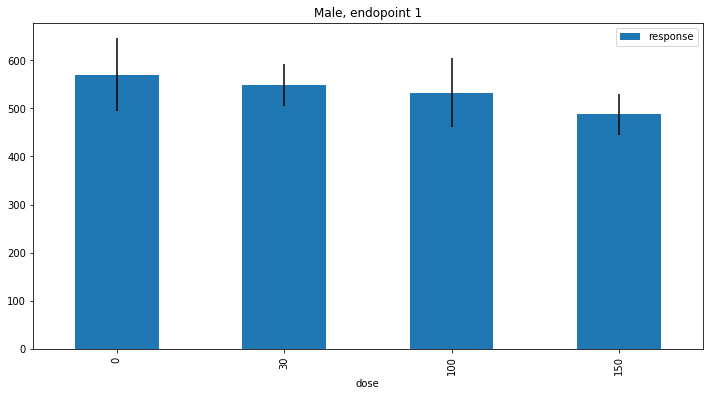

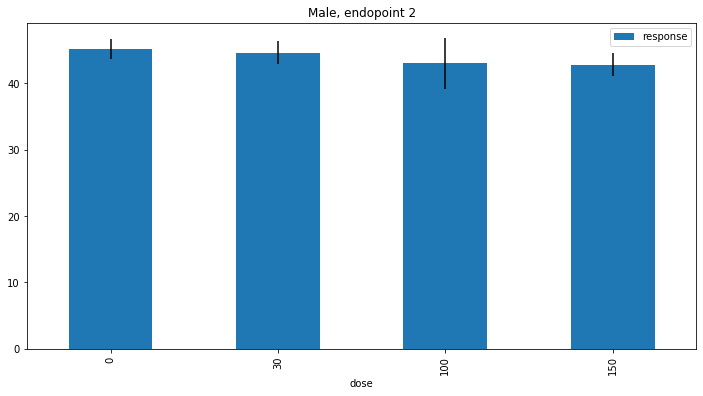

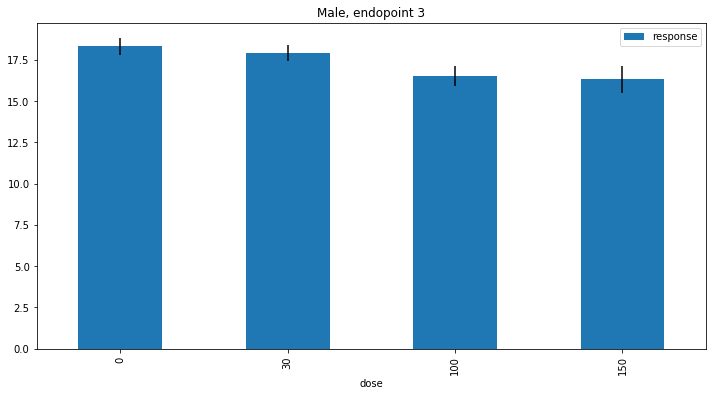

In [3]:
# aggiungere titoli
male_data=data[data.sex==0]

male_data_1=male_data[male_data.endpoint==1]
male_data_1.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Male, endopoint 1")


male_data_2=male_data[male_data.endpoint==2]
male_data_2.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Male, endopoint 2")

male_data_3=male_data[male_data.endpoint==3]
male_data_3.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Male, endopoint 3")

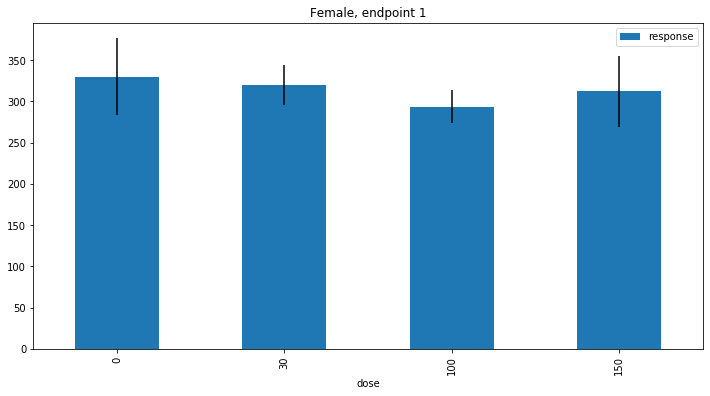

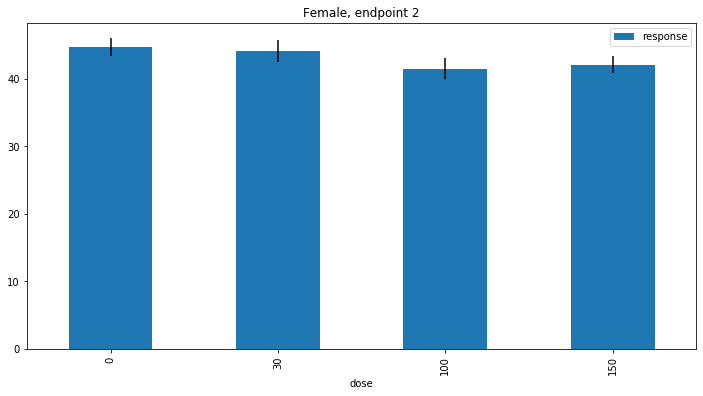

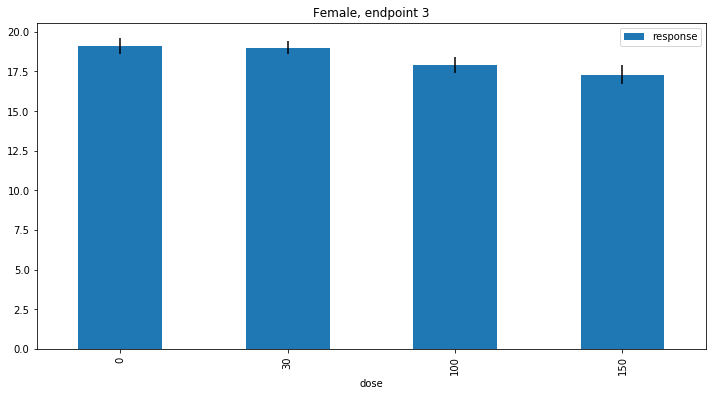

In [4]:
female_data=data[data.sex==1]

female_data_1=female_data[female_data.endpoint==1]
female_data_1.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Female, endpoint 1")

female_data_2=female_data[female_data.endpoint==2]
female_data_2.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Female, endpoint 2")

female_data_3=female_data[female_data.endpoint==3]
female_data_3.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Female, endpoint 3")

# Model computing

In [5]:
data_Endpoint1 = data[data.endpoint == 1]
data_Endpoint2 = data[data.endpoint == 2]
data_Endpoint3 = data[data.endpoint == 3]

## Request n°2

### Endpoint 1

In [19]:
Y= data_Endpoint1.response
weights = data_Endpoint1.SD
X = data_Endpoint1.drop(columns=["response", "SD", "endpoint"])

__COMMENTO__

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

In [22]:
group_of_models_endpoint1_fw = fn.mainForward(X, Y, weights)
group_of_models_endpoint1_bw = fn.mainBackward(X, Y, weights)

display(group_of_models_endpoint1_fw)
display(group_of_models_endpoint1_bw)

Processed  3 models on 1 predictors in 0.022984743118286133 seconds.
Processed  2 models on 2 predictors in 0.013991832733154297 seconds.
Processed  1 models on 3 predictors in 0.013996362686157227 seconds.
Total elapsed time: 0.08496999740600586 seconds.
Processed  3 models on 2 predictors in 0.020978689193725586 seconds.
Processed  2 models on 1 predictors in 0.00699615478515625 seconds.
Total elapsed time: 0.04896402359008789 seconds.


,RSS,model,number_of_predictors,name_of_predictors,Y_pred
1,123209.466339,<statsmodels.regression.linear_model.Regressio...,1,[number of animals],0 388.505906 1 431.673228 2 431.67322...
2,6222.696768,<statsmodels.regression.linear_model.Regressio...,2,"[number of animals, sex]",0 505.727901 1 561.919890 2 561.91989...
3,3908.060536,<statsmodels.regression.linear_model.Regressio...,3,"[number of animals, sex, dose]",0 524.738347 1 574.386279 2 554.18817...


,RSS,model,number_of_predictors,name_of_predictors,Y_pred
2,6222.696768,<statsmodels.regression.linear_model.Regressio...,2,"[number of animals, sex]",0 505.727901 1 561.919890 2 561.91989...
1,123209.466339,<statsmodels.regression.linear_model.Regressio...,1,[number of animals],0 388.505906 1 431.673228 2 431.67322...


### Endpoint 2

In [24]:
Y = data_Endpoint2.response
weights = data_Endpoint2.SD
X = data_Endpoint2.drop(columns=["response", "SD", "endpoint"])

In [10]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)
X

,1,number of animals,dose,sex,number of animals^2,number of animals dose,number of animals sex,dose^2,dose sex,sex^2,number of animals^3,number of animals^2 dose,number of animals^2 sex,number of animals dose^2,number of animals dose sex,number of animals sex^2,dose^3,dose^2 sex,dose sex^2,sex^3
0,1.0,9.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,729.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,10.0,30.0,0.0,100.0,300.0,0.0,900.0,0.0,0.0,1000.0,3000.0,0.0,9000.0,0.0,0.0,27000.0,0.0,0.0,0.0
2,1.0,10.0,100.0,0.0,100.0,1000.0,0.0,10000.0,0.0,0.0,1000.0,10000.0,0.0,100000.0,0.0,0.0,1000000.0,0.0,0.0,0.0
3,1.0,9.0,150.0,0.0,81.0,1350.0,0.0,22500.0,0.0,0.0,729.0,12150.0,0.0,202500.0,0.0,0.0,3375000.0,0.0,0.0,0.0
4,1.0,10.0,0.0,1.0,100.0,0.0,10.0,0.0,0.0,1.0,1000.0,0.0,100.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0
5,1.0,10.0,30.0,1.0,100.0,300.0,10.0,900.0,30.0,1.0,1000.0,3000.0,100.0,9000.0,300.0,10.0,27000.0,900.0,30.0,1.0
6,1.0,10.0,100.0,1.0,100.0,1000.0,10.0,10000.0,100.0,1.0,1000.0,10000.0,100.0,100000.0,1000.0,10.0,1000000.0,10000.0,100.0,1.0
7,1.0,10.0,150.0,1.0,100.0,1500.0,10.0,22500.0,150.0,1.0,1000.0,15000.0,100.0,225000.0,1500.0,10.0,3375000.0,22500.0,150.0,1.0


In [25]:
group_of_models_endpoint2_fw = fn.mainForward(X, Y, weights)
group_of_models_endpoint2_bw = fn.mainBackward(X, Y, weights)

display(group_of_models_endpoint2_fw)
display(group_of_models_endpoint2_bw)

Processed  3 models on 1 predictors in 0.02598285675048828 seconds.
Processed  2 models on 2 predictors in 0.015984535217285156 seconds.
Processed  1 models on 3 predictors in 0.004013776779174805 seconds.
Total elapsed time: 0.08295321464538574 seconds.
Processed  3 models on 2 predictors in 0.022986650466918945 seconds.
Processed  2 models on 1 predictors in 0.010995149612426758 seconds.
Total elapsed time: 0.050971269607543945 seconds.


,RSS,model,number_of_predictors,name_of_predictors,Y_pred
1,51.303412,<statsmodels.regression.linear_model.Regressio...,1,[number of animals],8 40.062992 9 44.514436 10 44.51443...
2,34.458343,<statsmodels.regression.linear_model.Regressio...,2,"[number of animals, sex]",8 41.469613 9 46.077348 10 46.07734...
3,27.729987,<statsmodels.regression.linear_model.Regressio...,3,"[number of animals, sex, dose]",8 42.494570 9 46.749479 10 45.66048...


,RSS,model,number_of_predictors,name_of_predictors,Y_pred
2,34.458343,<statsmodels.regression.linear_model.Regressio...,2,"[number of animals, sex]",8 41.469613 9 46.077348 10 46.07734...
1,51.303412,<statsmodels.regression.linear_model.Regressio...,1,[number of animals],8 40.062992 9 44.514436 10 44.51443...


### Endpoint 3

In [27]:
Y= data_Endpoint3.response
weights = data_Endpoint3.SD
X = data_Endpoint3.drop(columns=["response", "SD", "endpoint"])

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

display(X.shape)
display(Y.shape)

In [28]:
group_of_models_endpoint3_fw = fn.mainForward(X, Y, weights)
group_of_models_endpoint3_bw = fn.mainBackward(X, Y, weights)

display(group_of_models_endpoint3_fw)
display(group_of_models_endpoint3_bw)

Processed  3 models on 1 predictors in 0.020986080169677734 seconds.
Processed  2 models on 2 predictors in 0.027985334396362305 seconds.
Processed  1 models on 3 predictors in 0.01099395751953125 seconds.
Total elapsed time: 0.09194803237915039 seconds.
Processed  3 models on 2 predictors in 0.0159914493560791 seconds.
Processed  2 models on 1 predictors in 0.018988847732543945 seconds.
Total elapsed time: 0.048972129821777344 seconds.


,RSS,model,number_of_predictors,name_of_predictors,Y_pred
1,9.019606,<statsmodels.regression.linear_model.Regressio...,1,[number of animals],16 16.398425 17 18.220472 18 18.22047...
2,4.786838,<statsmodels.regression.linear_model.Regressio...,2,"[number of animals, dose]",16 17.192415 17 18.732641 18 17.86920...
3,4.724882,<statsmodels.regression.linear_model.Regressio...,3,"[number of animals, dose, sex]",16 17.104534 17 18.636181 18 17.77551...


,RSS,model,number_of_predictors,name_of_predictors,Y_pred
2,4.786838,<statsmodels.regression.linear_model.Regressio...,2,"[number of animals, dose]",16 17.192415 17 18.732641 18 17.86920...
1,9.019606,<statsmodels.regression.linear_model.Regressio...,1,[number of animals],16 16.398425 17 18.220472 18 18.22047...


## Request n°3

In [29]:
Y = data.response
weights = data.SD
X = data.drop(columns=["response","SD"])

In [30]:
models_fwd = fn.mainForward(X,Y,weights)
models_bwd = fn.mainBackward(X,Y,weights)

Processed  4 models on 1 predictors in 0.023985624313354492 seconds.
Processed  3 models on 2 predictors in 0.027983903884887695 seconds.
Processed  2 models on 3 predictors in 0.02098870277404785 seconds.
Processed  1 models on 4 predictors in 0.00699615478515625 seconds.
Total elapsed time: 0.11093664169311523 seconds.
Processed  4 models on 3 predictors in 0.015991687774658203 seconds.
Processed  3 models on 2 predictors in 0.01399540901184082 seconds.
Processed  2 models on 1 predictors in 0.008996963500976562 seconds.
Total elapsed time: 0.06896281242370605 seconds.


In [31]:
group_of_models_fw = fn.compute_criteria(models_fwd)
group_of_models_bw = fn.compute_criteria(models_bwd)

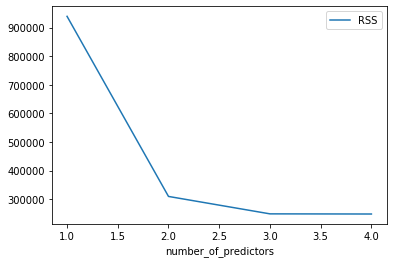

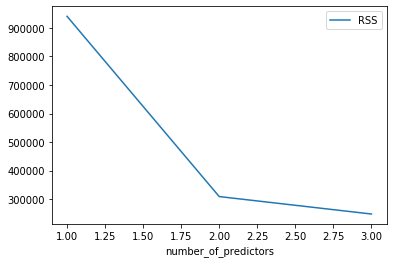

In [35]:
models_fwd.plot(x='number_of_predictors', y='RSS', title = "RSS forward")
models_bwd.plot(x='number_of_predictors', y='RSS', title = "RSS backward")

In [17]:
criteriaToMin = ["bic","aic"]
criteriaToMax = ["adj_rsquare"]
best_models = fn.selectBestForEachCriteria(models_fwd, criteriaToMin, criteriaToMax)

The criteria is: bic
Features: ['number of animals', 'endpoint', 'intercept']
Criteria value: 301.6188819134545
Degrees of freedom: 3.0

The criteria is: aic
Features: ['number of animals', 'endpoint', 'intercept']
Criteria value: 299.2627742527586
Degrees of freedom: 3.0

The criteria is: adj_rsquare
Features: ['number of animals', 'endpoint', 'intercept']
Criteria value: 0.7836634896972798
Degrees of freedom: 3.0



In [18]:
best_models

,RSS,model,number_of_predictors,name_of_predictors,Y_pred,aic,bic,mse,adj_rsquare
bic,309524,<statsmodels.regression.linear_model.Regressio...,2,"[number of animals, endpoint]",0 314.581858 1 371.461614 2 371.46...,299.263,301.619,65034.3,0.783663
aic,309524,<statsmodels.regression.linear_model.Regressio...,2,"[number of animals, endpoint]",0 314.581858 1 371.461614 2 371.46...,299.263,301.619,65034.3,0.783663
adj_rsquare,309524,<statsmodels.regression.linear_model.Regressio...,2,"[number of animals, endpoint]",0 314.581858 1 371.461614 2 371.46...,299.263,301.619,65034.3,0.783663
